### Iris 데이터 분석

* 참고
  * https://swub.tistory.com/13
  * https://datascienceschool.net/view-notebook/577a01e24d4f456bb5060da6e47054e1/

In [1]:
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'
# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import load_iris

In [3]:
data_iris = load_iris()

In [4]:
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
sy = pd.Series(data_iris.target, dtype="category")
sy = sy.cat.rename_categories(data_iris.target_names)
iris['species'] = sy

In [7]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.shape

(150, 5)

In [9]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [10]:
iris.columns # sepal : 꽃받침, petal : 꽃잎

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [11]:
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [21]:
iris.rename(columns={iris.columns[0] : '꽃받침 길이',
                     iris.columns[1] : '꽃받침 넓이',
                     iris.columns[2] : '꽃잎 길이',
                     iris.columns[3] : '꽃잎 넓이',
                     iris.columns[4] : 'Y'}, inplace = True)

In [22]:
iris.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
st = iris.groupby(iris.Y).mean() # Y를 기준으로 그룹화를 하여 각 그룹의 평균을 구하여 준다.
st.columns.name = "변수" # columns의 이름을 "변수"로 지정한다.
st

변수,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
Y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [34]:
iris.describe()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


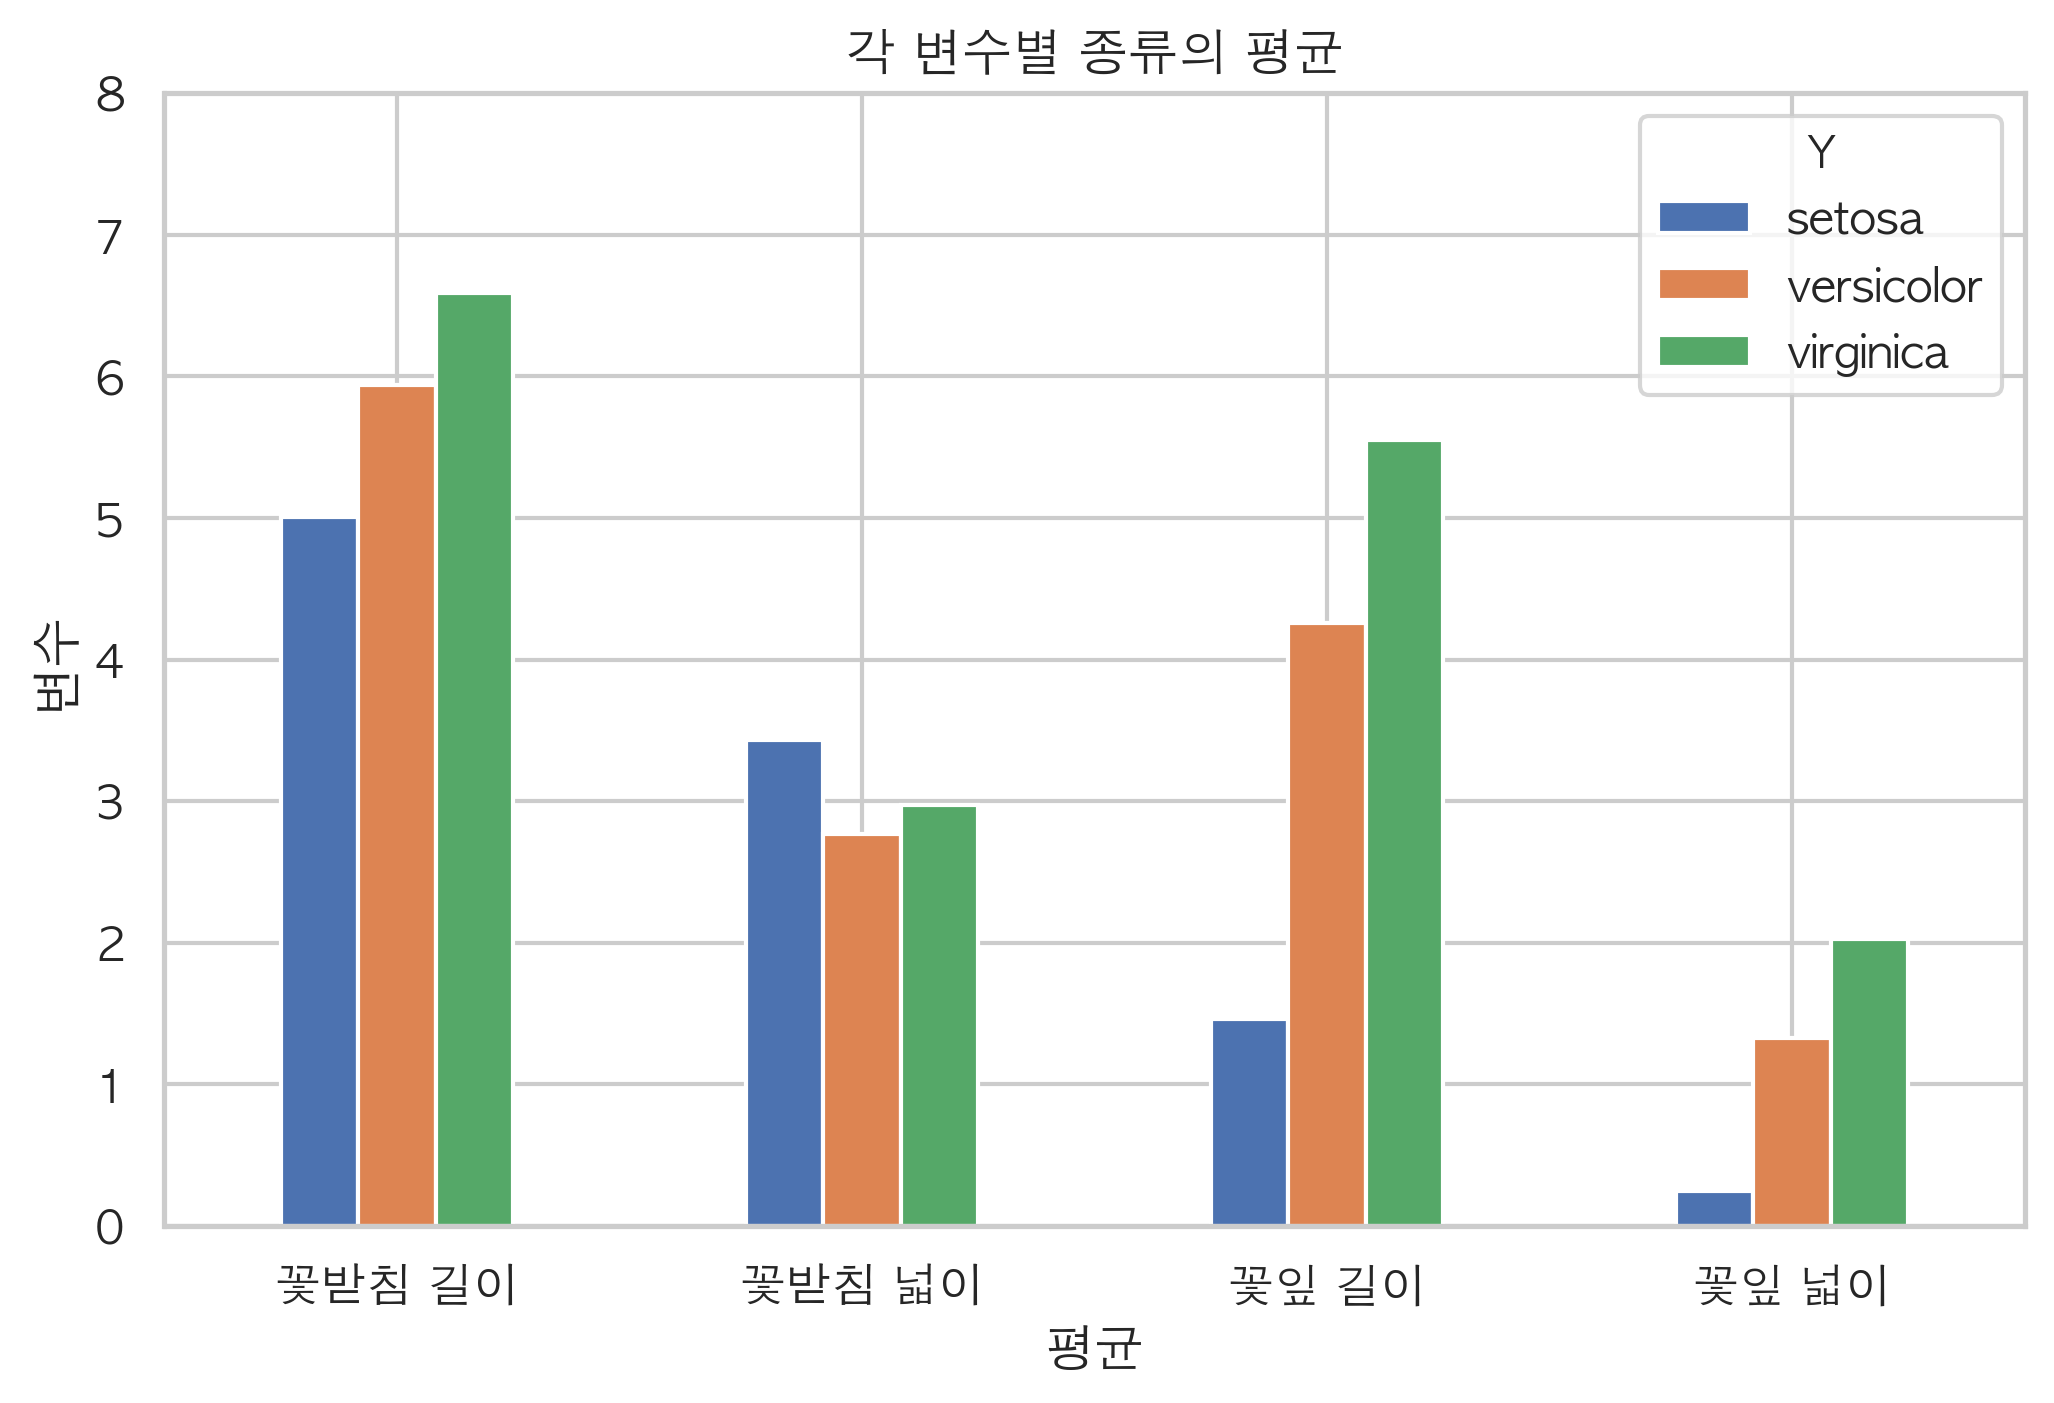

In [24]:
st.T.plot.bar(rot=0) # rot : x축 변수명의 기울기
plt.title("각 변수별 종류의 평균")
plt.xlabel("평균")
plt.ylabel("변수")
plt.ylim(0,8)
plt.show()

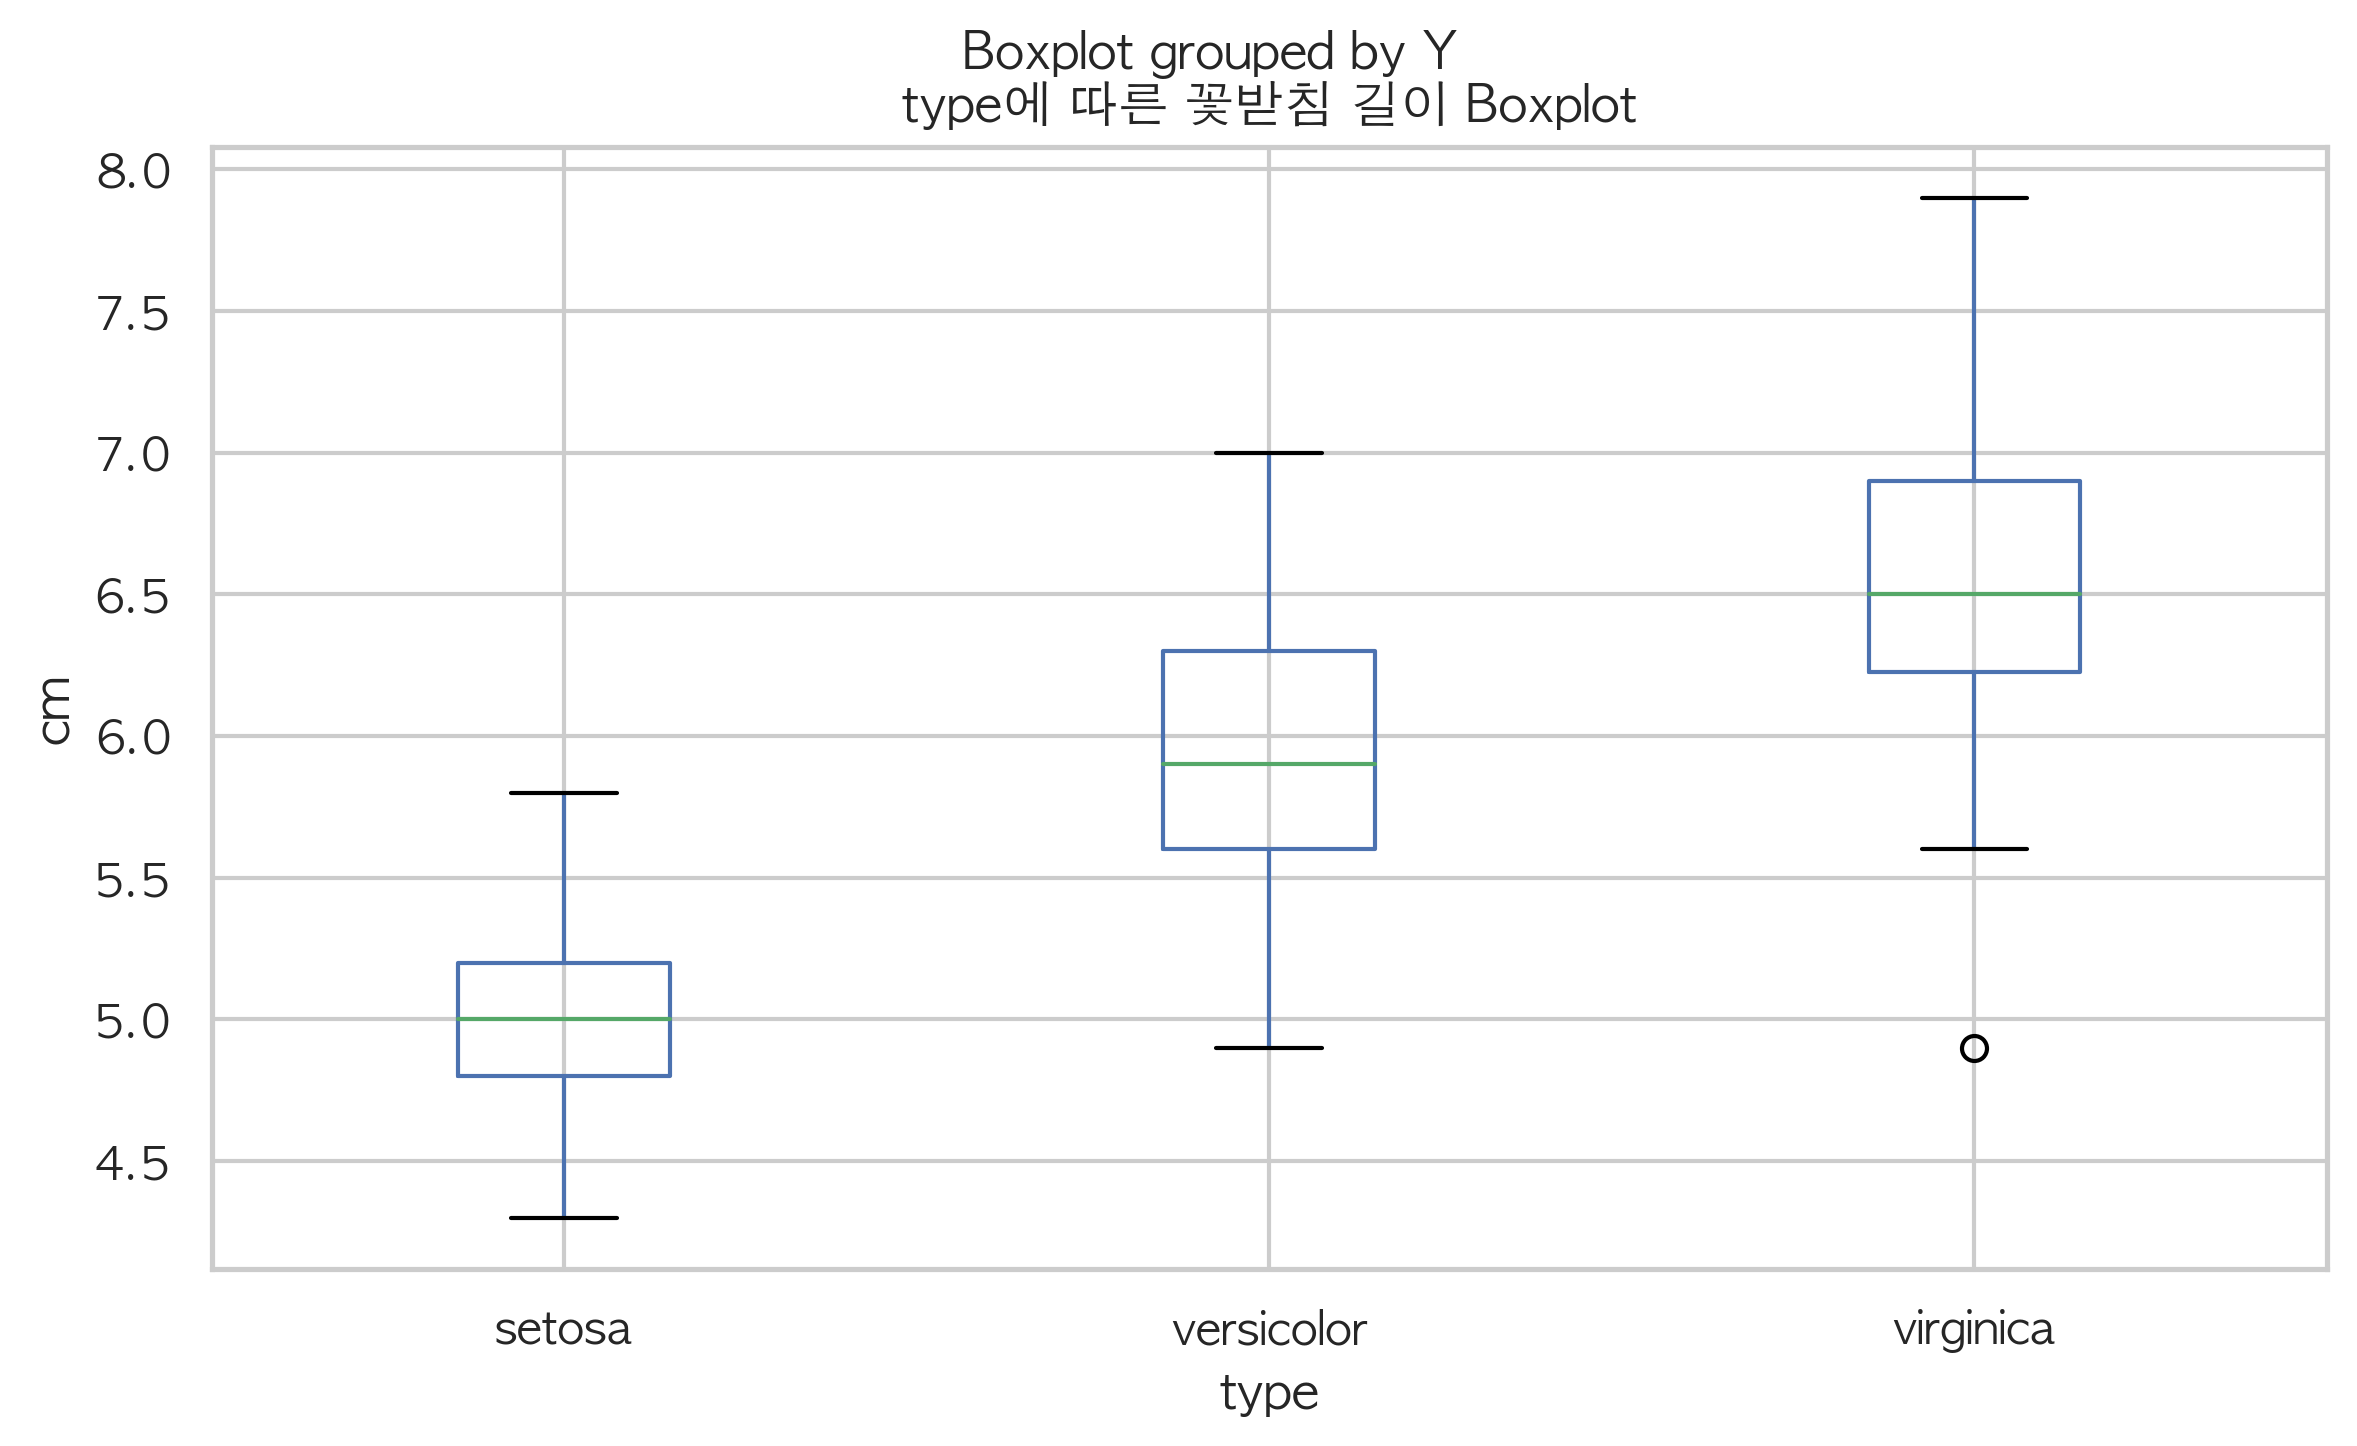

In [25]:
iris[["꽃받침 길이","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) # pad: 박스플랏과 제목 사이 간격, h_pad: 1행 2행 사이 간격
plt.title("type에 따른 꽃받침 길이 Boxplot")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

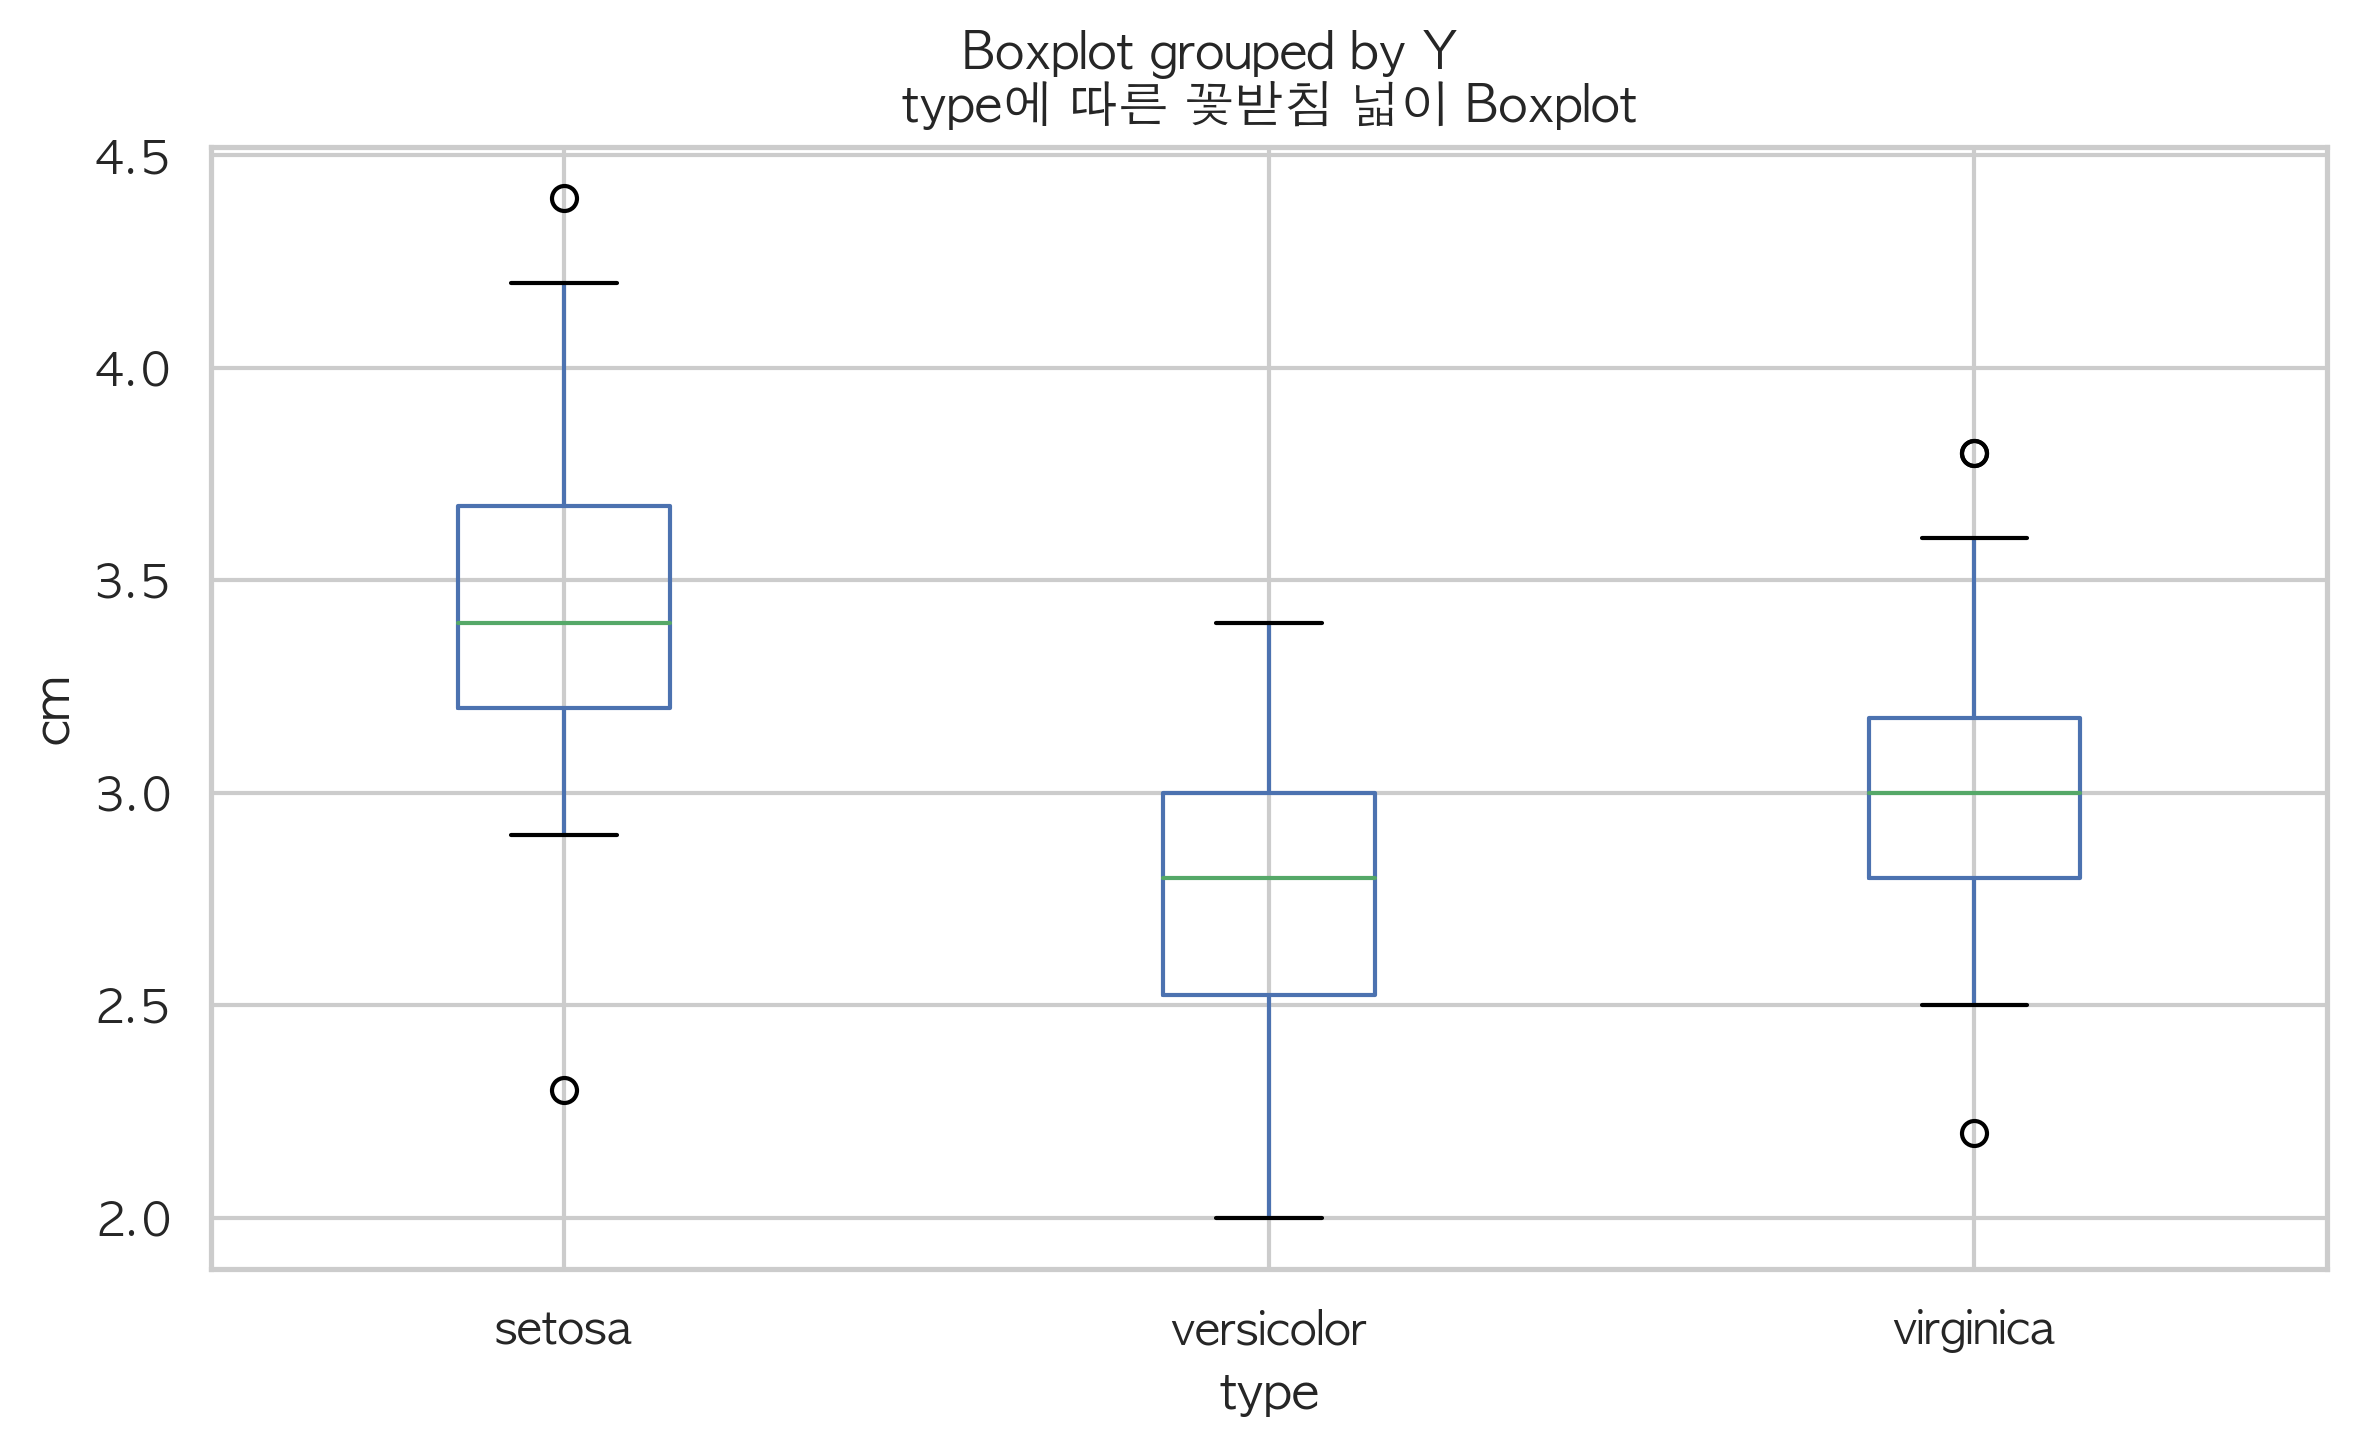

In [26]:
iris[["꽃받침 넓이","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) # pad: 박스플랏과 제목 사이 간격, h_pad: 1행 2행 사이 간격
plt.title("type에 따른 꽃받침 넓이 Boxplot")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

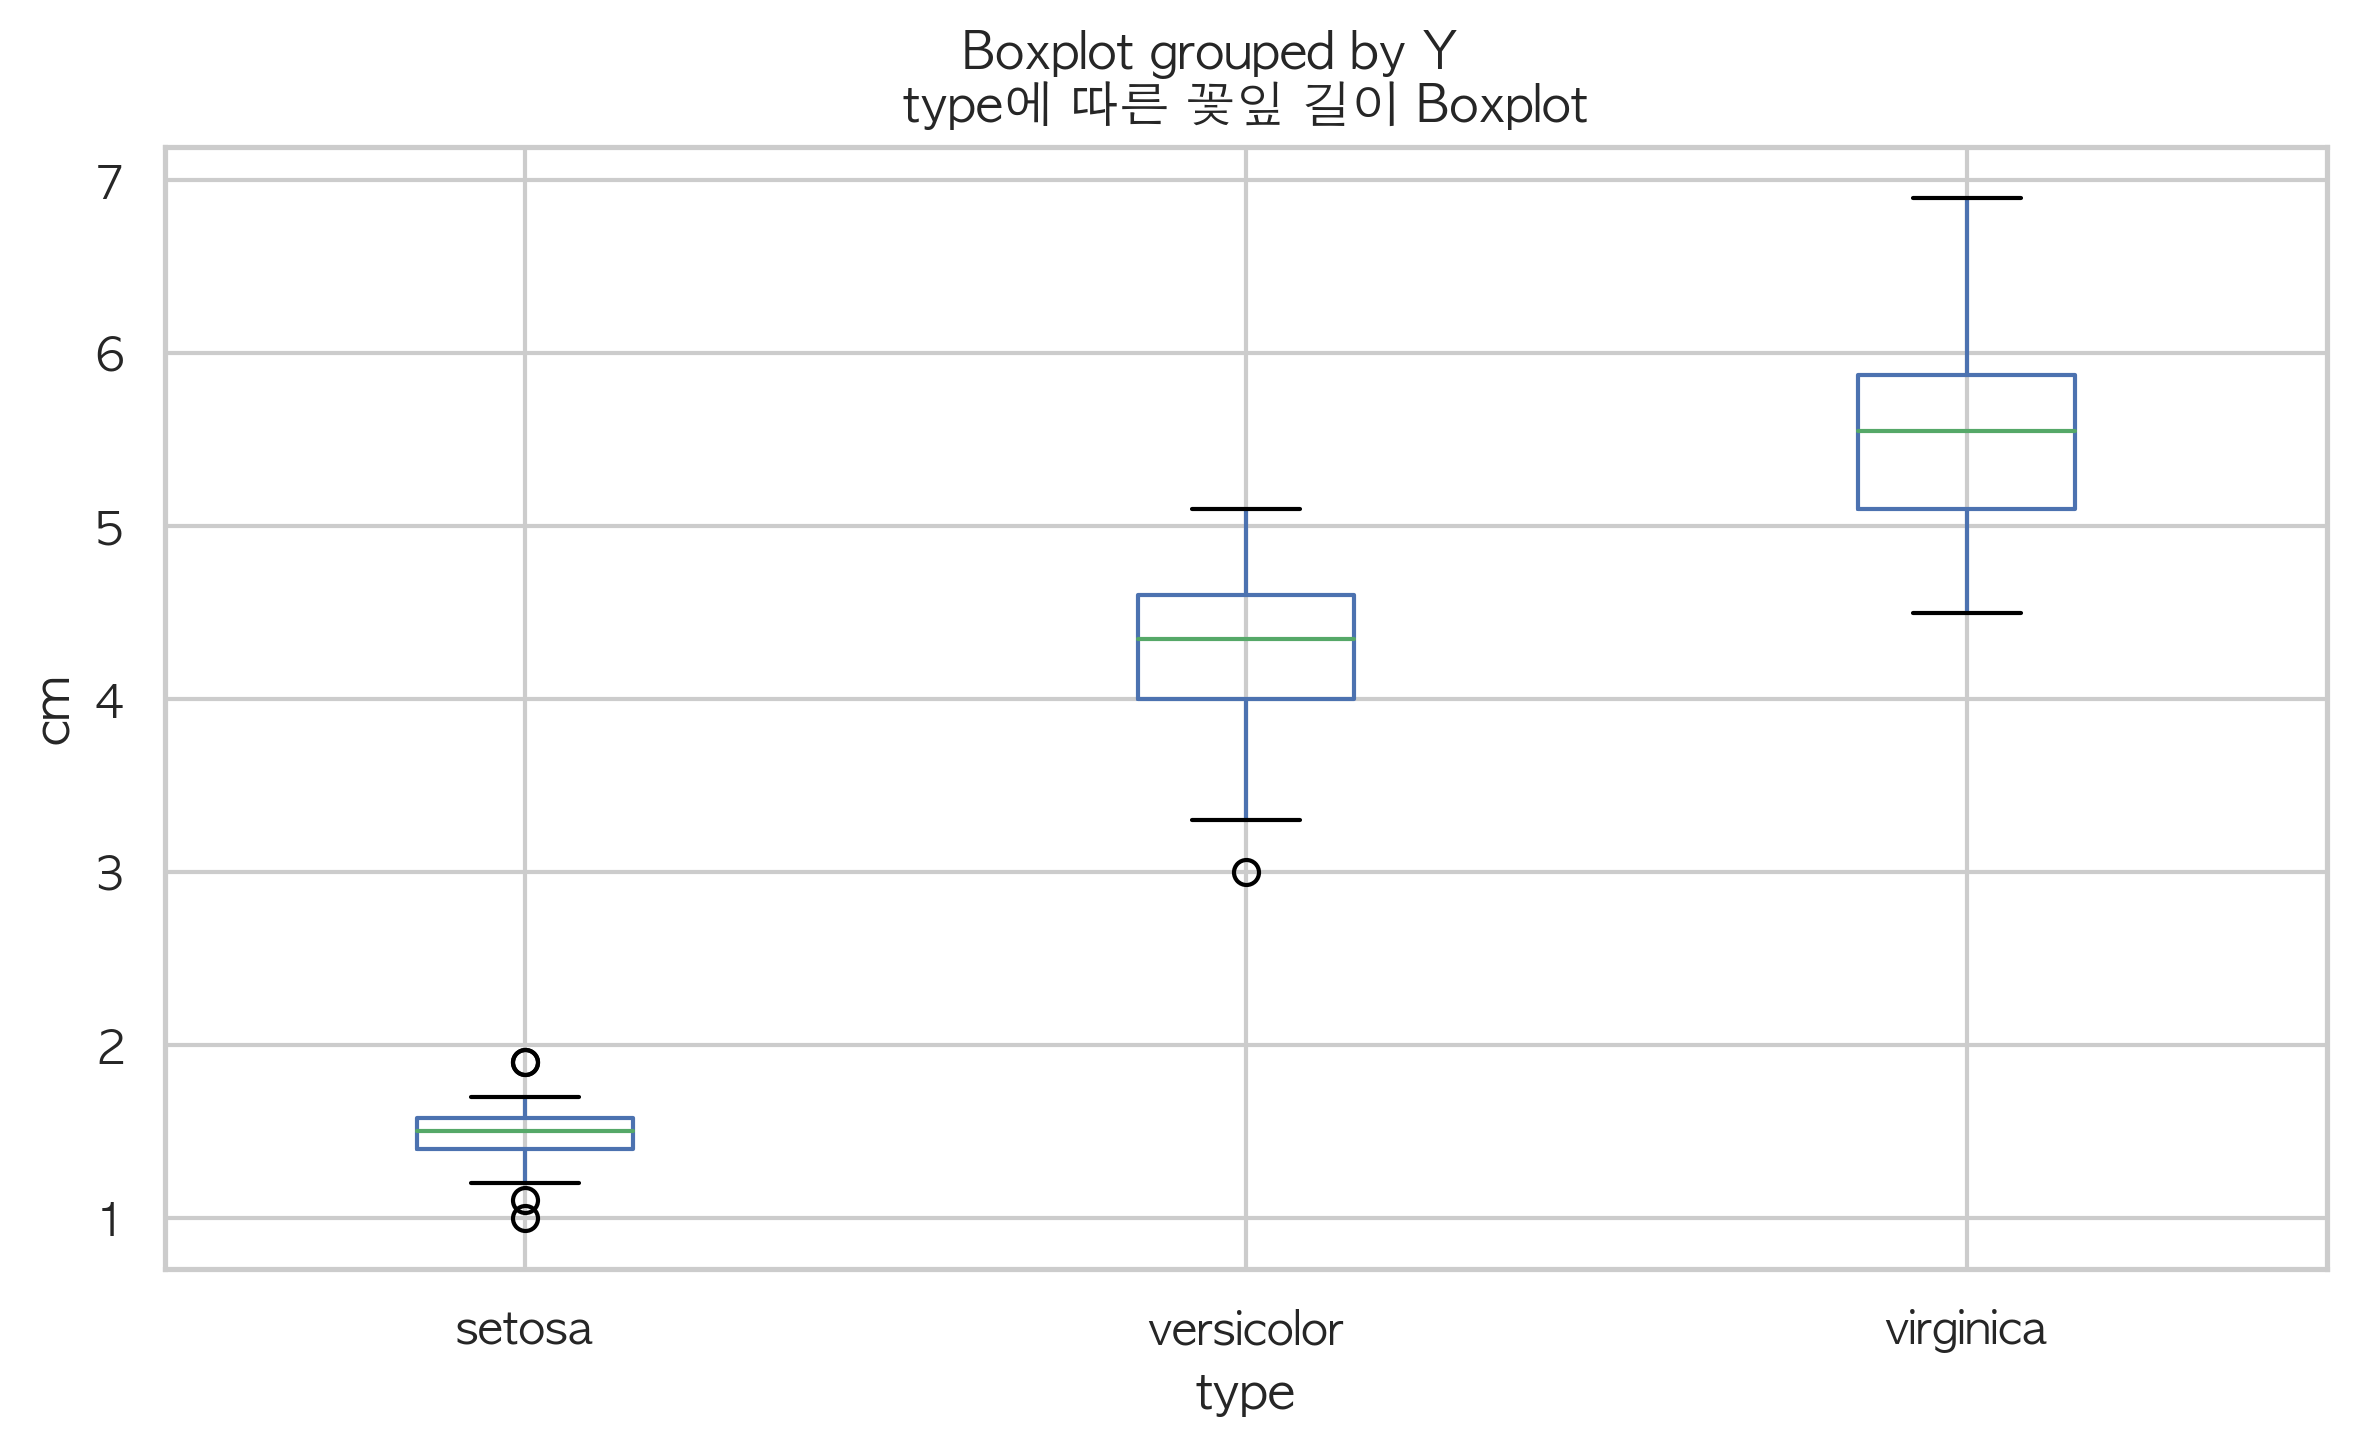

In [27]:
iris[["꽃잎 길이","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) # pad: 박스플랏과 제목 사이 간격, h_pad: 1행 2행 사이 간격
plt.title("type에 따른 꽃잎 길이 Boxplot")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

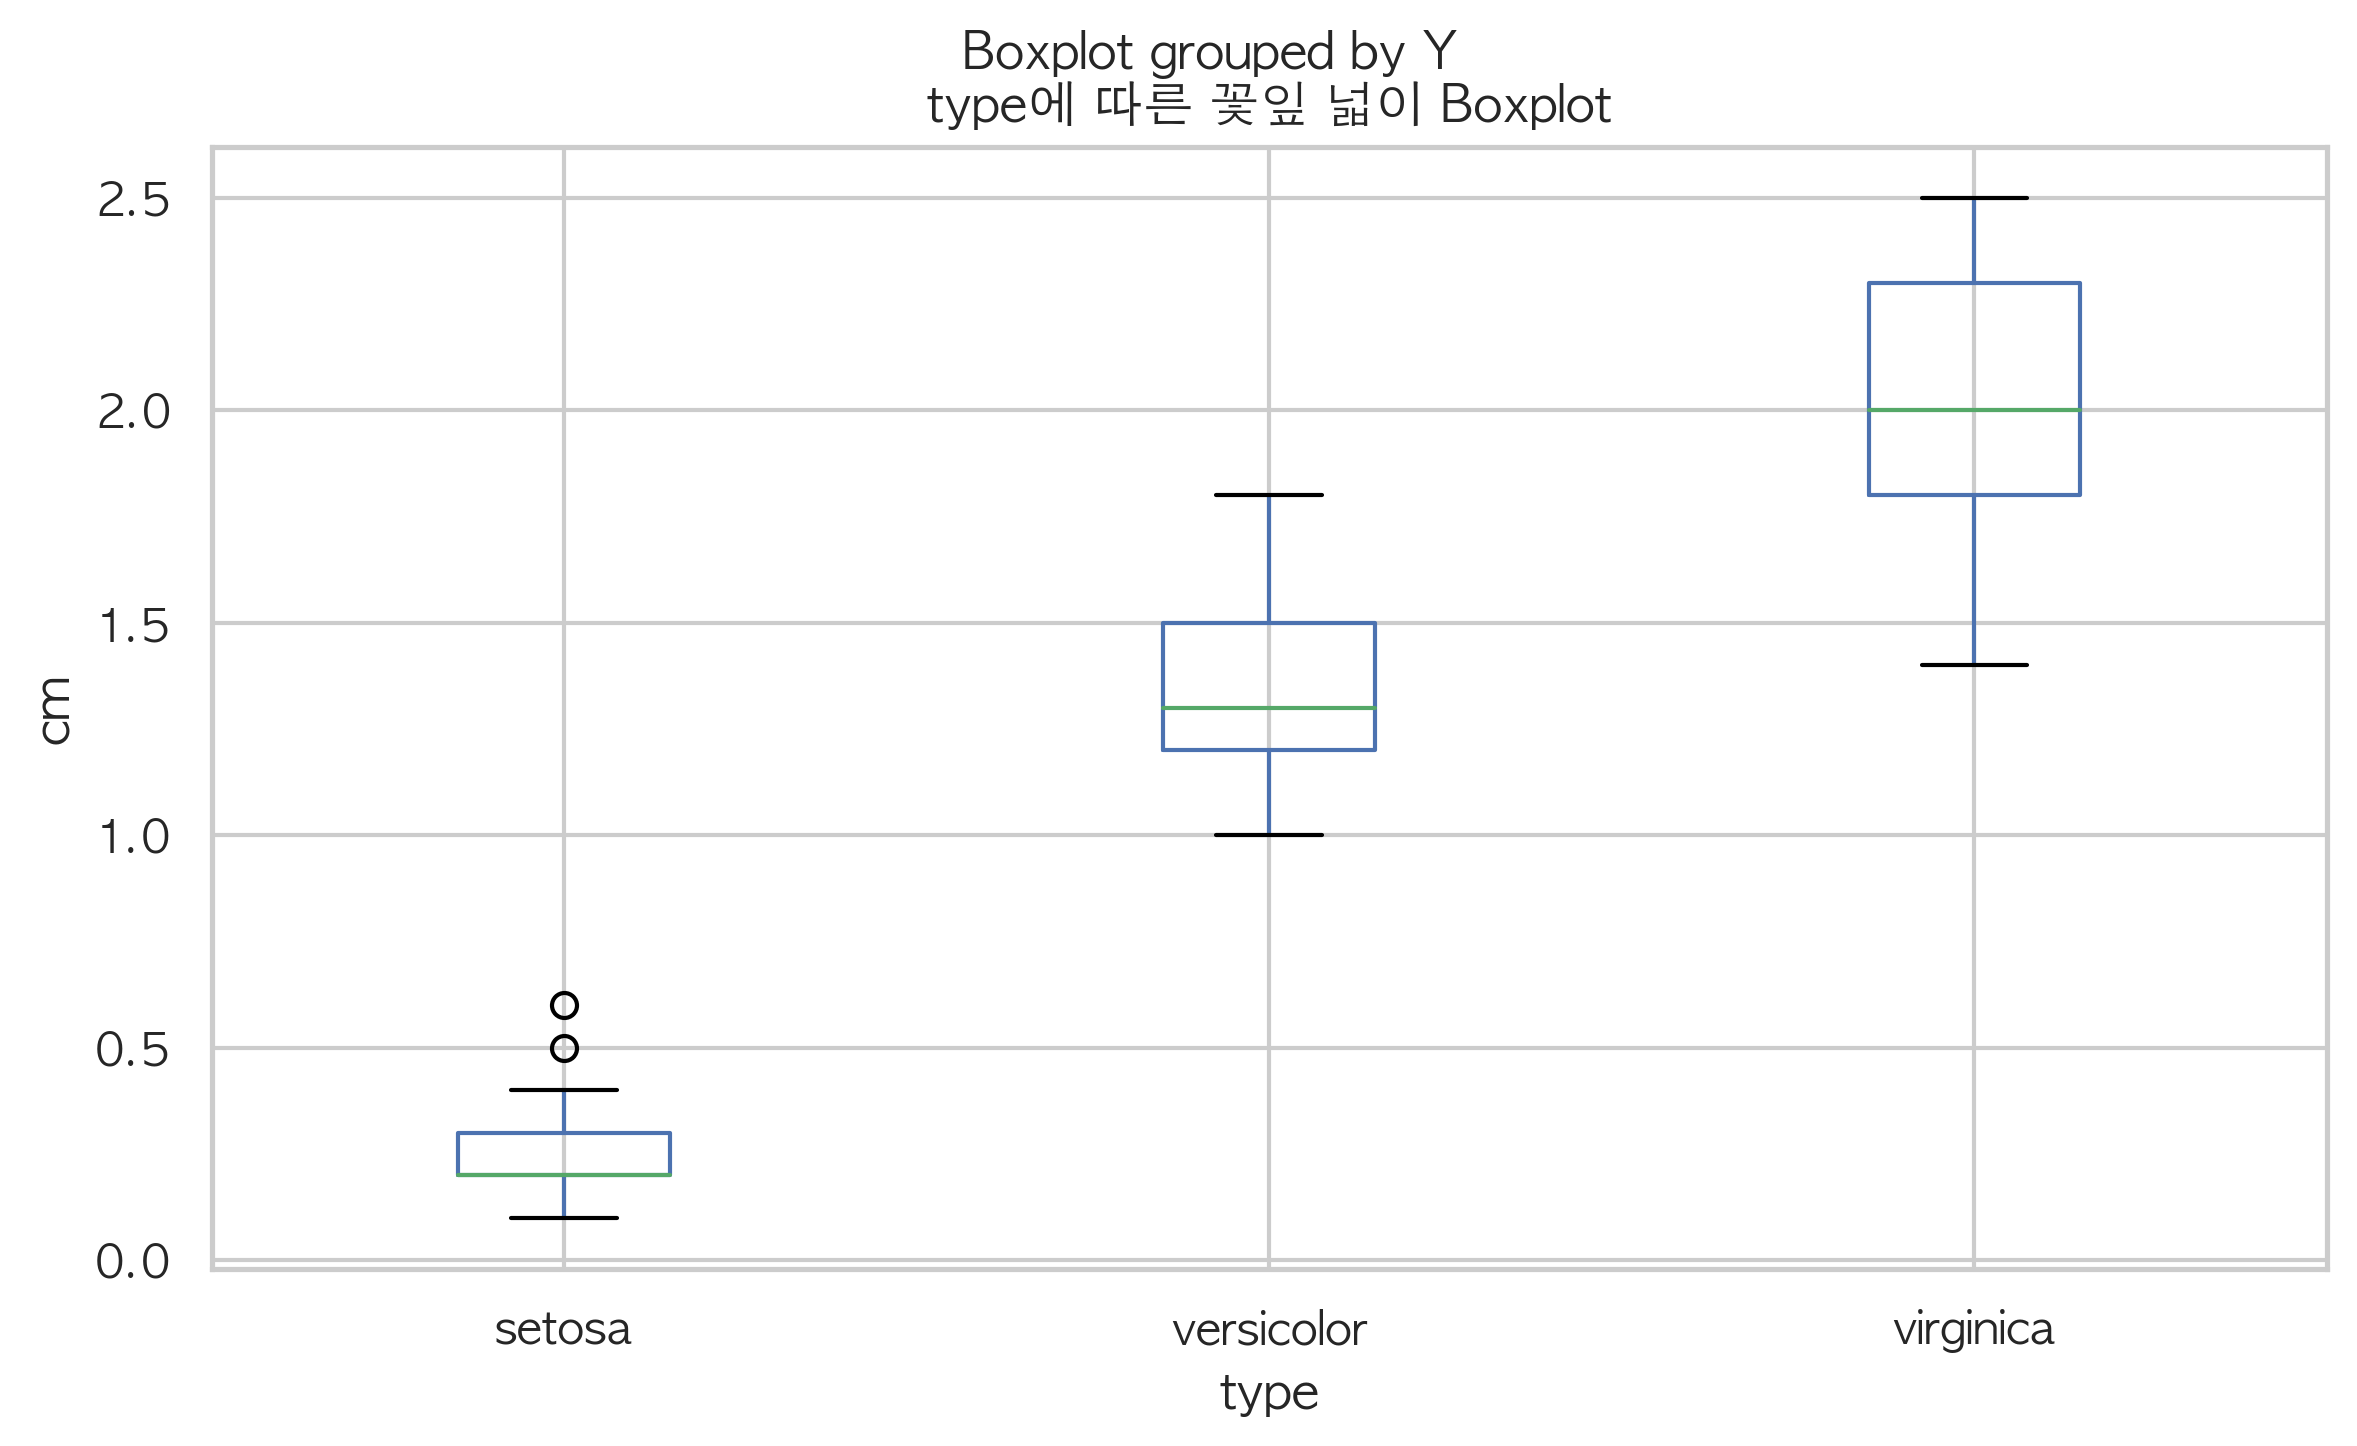

In [28]:
iris[["꽃잎 넓이","Y"]].boxplot(by='Y')
plt.tight_layout(pad=2, h_pad=1) # pad: 박스플랏과 제목 사이 간격, h_pad: 1행 2행 사이 간격
plt.title("type에 따른 꽃잎 넓이 Boxplot")
plt.xlabel("type")
plt.ylabel("cm")
plt.show()

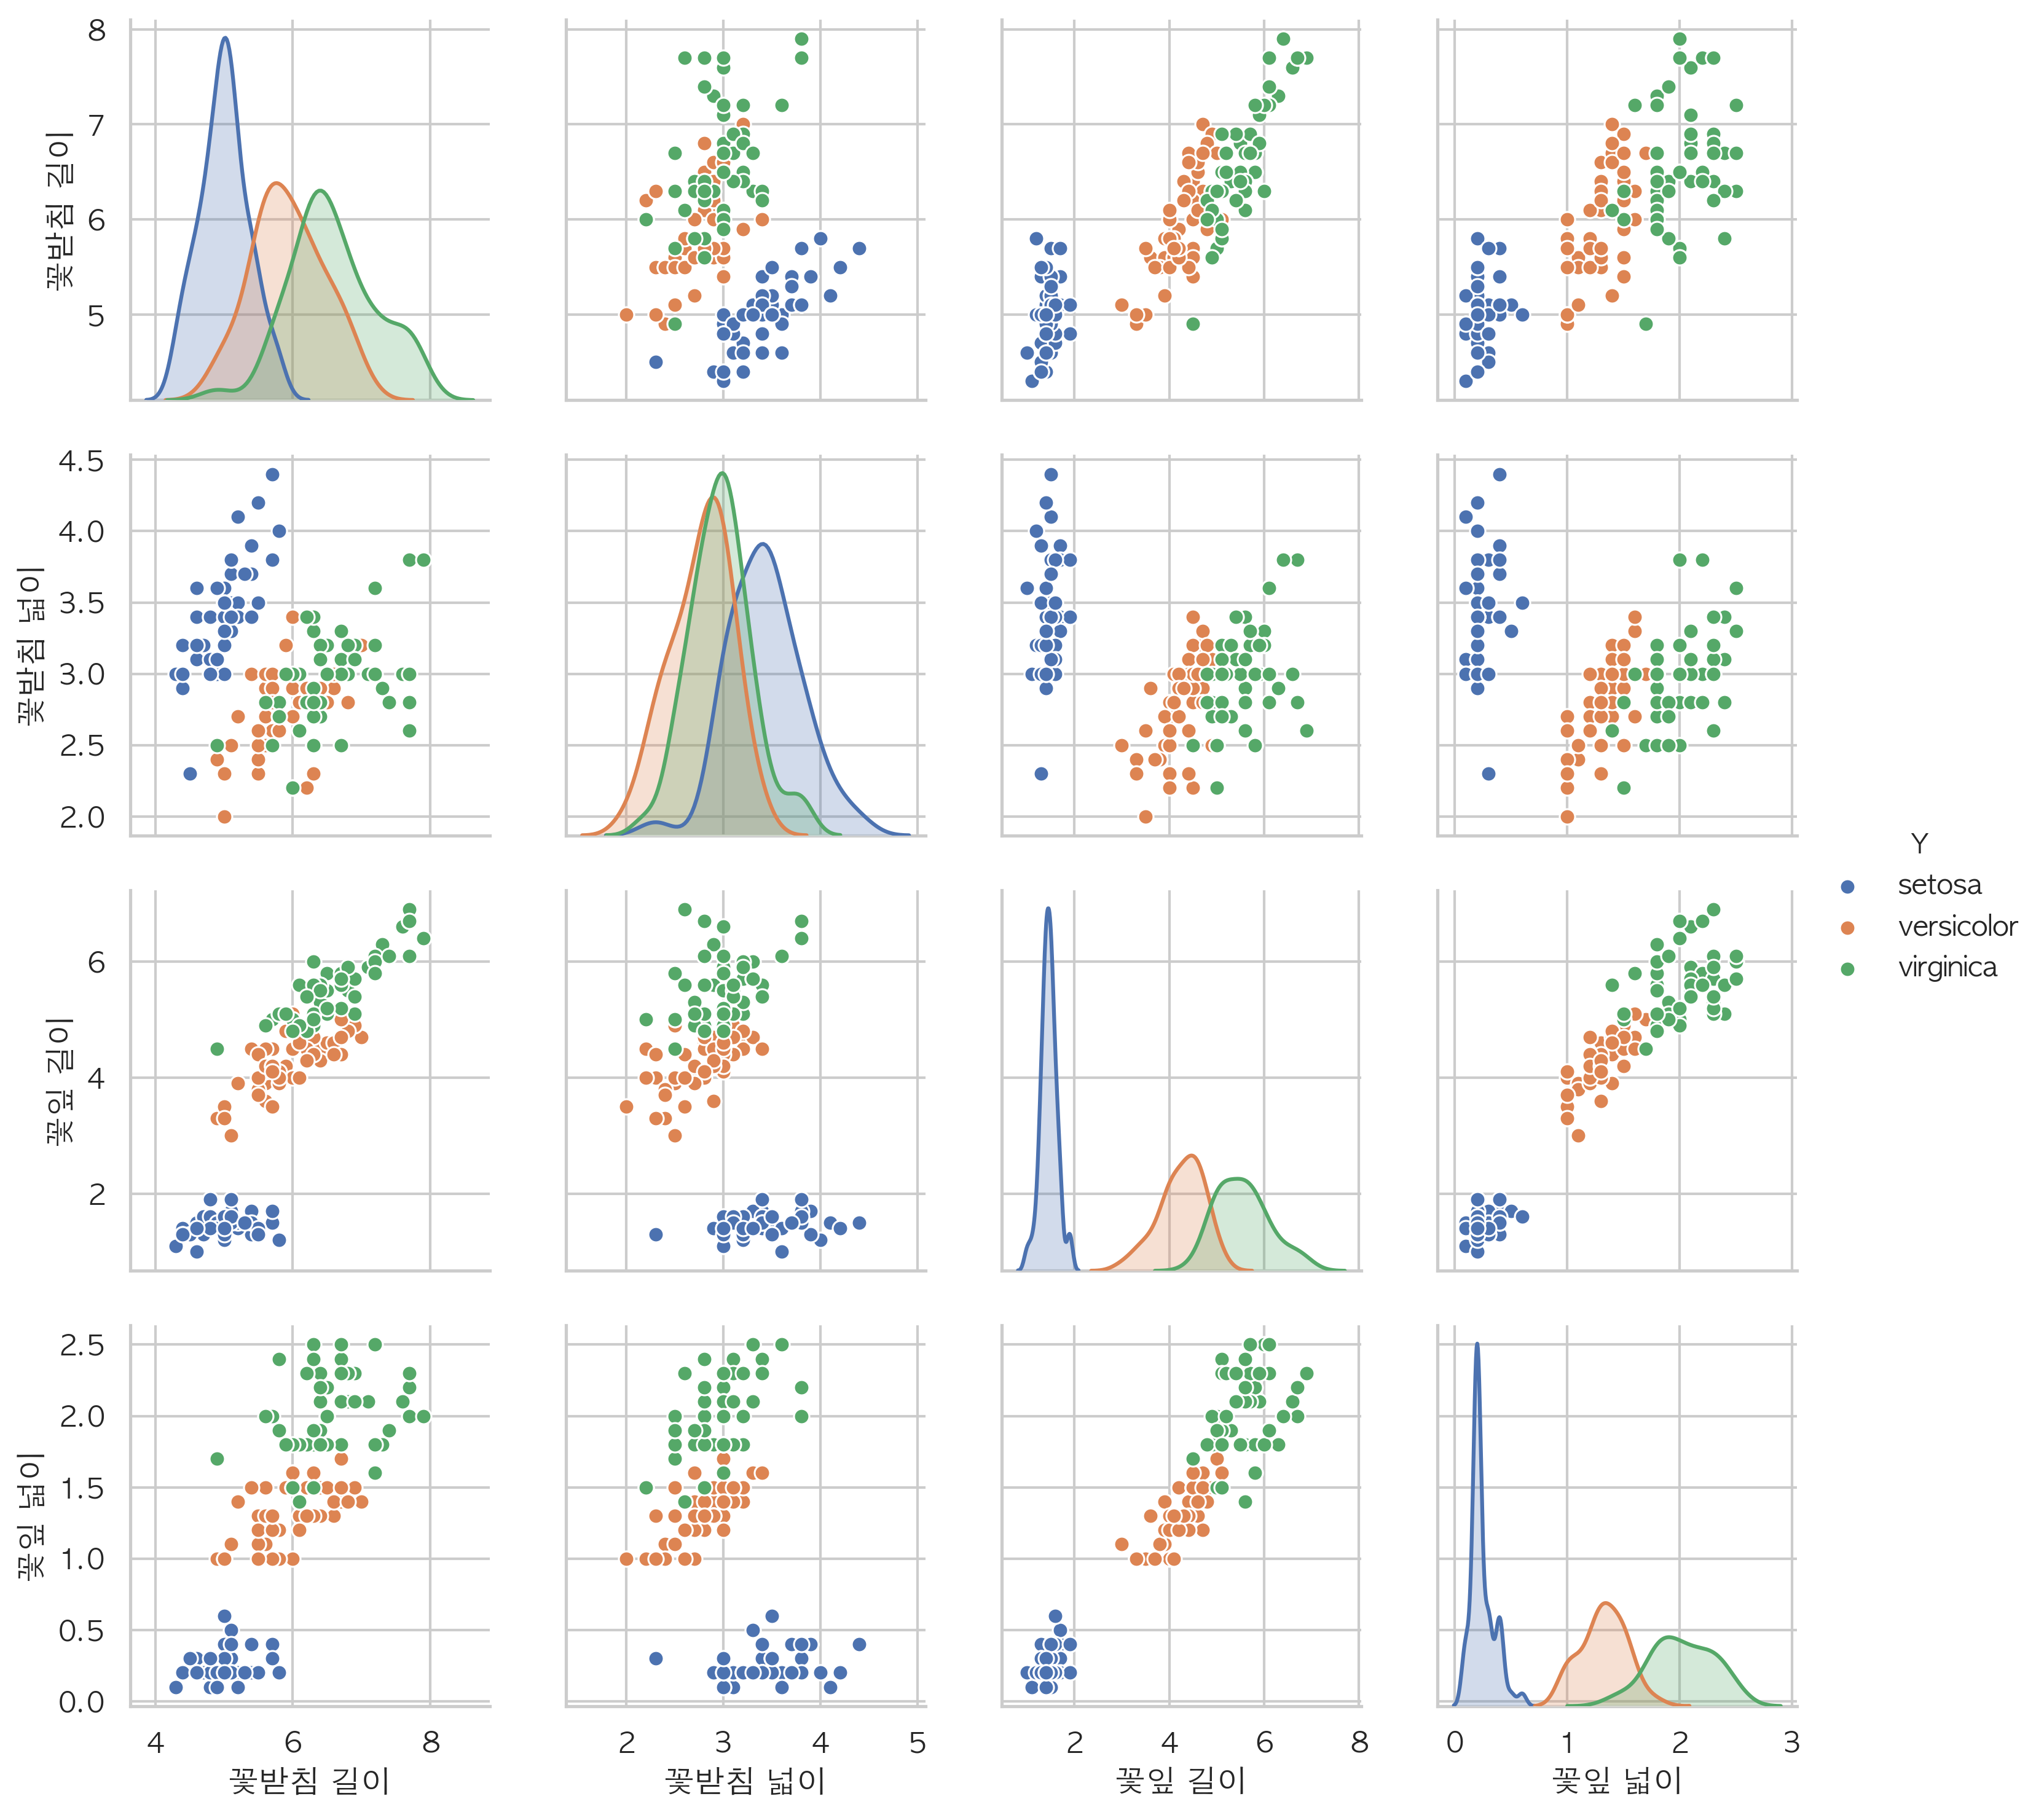

In [31]:
sns.pairplot(iris, hue="Y")
plt.show()

* 로지스틱 회귀 분석
* 최근접 이웃 분석